# 1. PCA using numpy 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

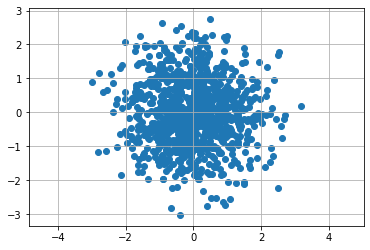

In [2]:
# Generate data
rng = np.random.RandomState(0)
W = rng.randn(1000,2)
plt.scatter(W[:,0], W[:,1])
plt.axis('equal')
plt.grid('on')

In [3]:
A = rng.rand(2,2)
X = np.dot(W, A)

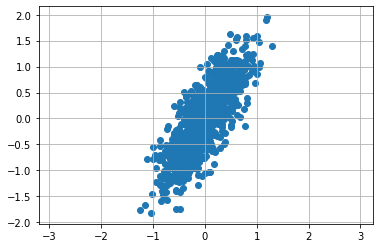

In [4]:
plt.scatter(X[:,0], X[:,1])
plt.axis('equal')
plt.grid('on')

In [5]:
# Check the variance
print(np.var(X[:, 0]))
print(np.var(X[:, 1]))

0.16146981846434738
0.4143398991106429


In [6]:
# Covariance matrix

C = np.cov(X.T)
C

array([[0.16163145, 0.20478164],
       [0.20478164, 0.41475465]])

In [7]:
# Find the eigenvalue and eigen vector (PC Components)

e, V = np.linalg.eig(C)


In [8]:
e

array([0.04745802, 0.52892809])

In [9]:
V

array([[-0.8734214 , -0.48696515],
       [ 0.48696515, -0.8734214 ]])

In [10]:
# Relates to e[0]
V[:,0]

array([-0.8734214 ,  0.48696515])

In [11]:
# Relates to e[1]
V[:,1]

array([-0.48696515, -0.8734214 ])

In [12]:
# Choosing vector of max of eigenvalues e[1]
u = V[:,1]

In [13]:
Z = np.dot(X, u)
Z.shape

(1000,)

In [14]:
# variance is greater than both print(np.var(X[:, 0])) & print(np.var(X[:, 1]))

np.var(Z)

0.5283991599193654

In [15]:
Y = np.outer(Z, u.T)
Y.shape

(1000, 2)

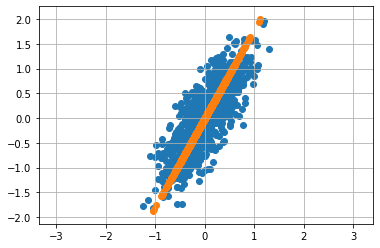

In [16]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(Y[:, 0], Y[:, 1])
plt.axis('equal')
plt.grid('on')

# 2. PCA Using sklearn on Iris dataset

In [17]:
from sklearn import datasets
from sklearn.decomposition import PCA


In [18]:
iris = datasets.load_iris()

In [19]:
X = iris.data
y = iris.target

In [20]:
X.shape

(150, 4)

In [21]:
y.shape

(150,)

In [22]:
# Reduce shape to 150,2
pca = PCA(n_components = 2)

In [23]:
# fit the figures
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [24]:
# Eigenvalues
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [25]:
Z = pca.transform(X)

In [26]:
Z.shape

(150, 2)

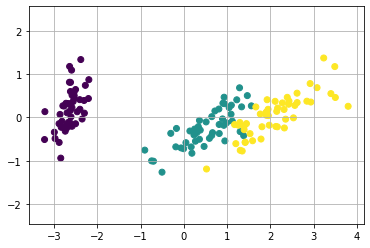

In [27]:
plt.scatter(Z[:,0], Z[:,1], c = y)
#plt.scatter(Y[:, 0], Y[:, 1])
plt.axis('equal')
plt.grid('on')

# 3. PCA using sklearn on digits dataset

In [28]:
# 64 dimensions
digits = datasets.load_digits()
digits.data.shape

(1797, 64)

In [29]:
# 64 dimension is 8x8 image 
digits.images.shape

(1797, 8, 8)

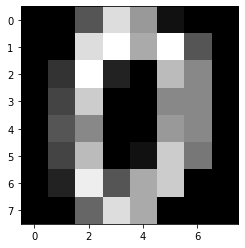

In [30]:
plt.imshow(digits.images[0], cmap = 'gray')

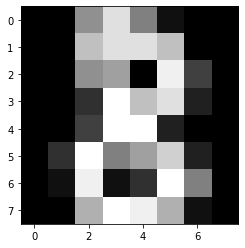

In [31]:
plt.imshow(digits.images[8], cmap = 'gray')

In [32]:
digits.target.shape

(1797,)

In [33]:
# Reduce dimentions to 2 & fit the model

pca = PCA(n_components=2)
pca.fit(digits.data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [34]:
Z = pca.transform(digits.data)

In [35]:
Z.shape

(1797, 2)

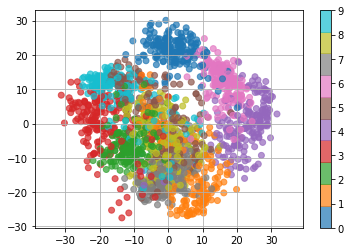

In [36]:
plt.scatter(Z[:,0], Z[:,1], c = digits.target, cmap = 'tab10', alpha = 0.7)
plt.colorbar()
#plt.scatter(Y[:, 0], Y[:, 1])
plt.axis('equal')
plt.grid('on')